In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy
import torchvision

train = torchvision.datasets.MNIST('mnist', train = True, download = False)
test = torchvision.datasets.MNIST('mnist', train = False, download = False)

train_images = numpy.array([ numpy.array(item[0]) for item in train ])
train_labels = numpy.array([ item[1] for item in train ])

test_images = numpy.array([ numpy.array(item[0]) for item in test ])
test_labels = numpy.array([ item[1] for item in test ])

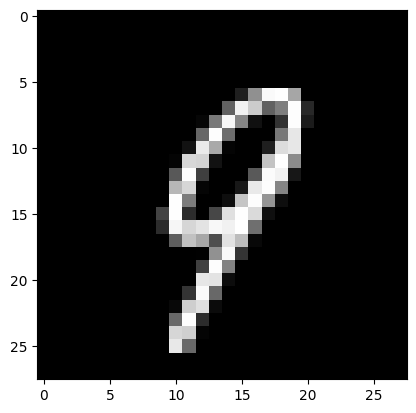

In [3]:
import matplotlib.pyplot as plt

plt.imshow(train_images[22], cmap = "gray")

In [4]:
import os
import cvtda.topology

def make_features(train, test, binarizer, filtration):
    if binarizer is not None:
        train = binarizer.fit_transform(train)
        test = binarizer.transform(test)
        
    if filtration is not None:
        train = filtration.fit_transform(train)
        test = filtration.transform(test)

    filtrations_to_diagrams = cvtda.topology.FiltrationsToDiagrams(homology_dimensions = [ 0, 1 ], verbose = False)
    train = filtrations_to_diagrams.fit_transform(train)
    test = filtrations_to_diagrams.transform(test)
    print(train.shape, test.shape)

    if len(train[0]) < 96:
        n_bins = 32
    elif len(train[0]) < 192:
        n_bins = 64
    else:
        n_bins = 128

    print(f"Bins: {n_bins}")
    digrams_to_features = cvtda.topology.DiagramsToFeatures(batch_size = 625, n_bins = n_bins, verbose = False)
    train = digrams_to_features.fit_transform(train)
    test = digrams_to_features.transform(test)
    print(train.shape, test.shape)
    return train, test

In [5]:
import itertools

import gtda.images

def process(train: numpy.ndarray, test: numpy.ndarray):
    train_features = [ ]
    test_features = [ ]
    tr, te = make_features(train, test, binarizer = None, filtration = None)
    train_features.append(tr)
    test_features.append(te)

    if train.shape[-1] == 28:
        centers = [ 5, 11, 16, 22 ]
    else:
        centers = [ 4, 9 ]
    print(centers)

    greyscale_to_filtrations = cvtda.topology.GreyscaleToFiltrations(
        binarizer_threshold = 0.1,
        radial_filtration_centers = list(itertools.product(centers, centers))
    )
    for i, filtration in enumerate(greyscale_to_filtrations.filtrations_):
        print(f"{i}/{len(greyscale_to_filtrations.filtrations_)}). {filtration}")
        tr, te = make_features(
            train,
            test,
            binarizer = gtda.images.Binarizer(threshold = 0.1),
            filtration = filtration
        )
        train_features.append(tr)
        test_features.append(te)
    return numpy.hstack(train_features), numpy.hstack(test_features)

In [6]:
import tqdm

def split_image(image: numpy.ndarray) -> numpy.ndarray:
    splits = [ ]
    for start_x in range(0, 15, 7):
        for start_y in range(0, 15, 7):
            splits.append(image[start_x:start_x + 14, start_y:start_y + 14])
    return numpy.array(splits)

train_image_parts = numpy.array([ split_image(item) for item in tqdm.tqdm(train_images) ]).transpose((1, 0, 2, 3))
test_image_parts = numpy.array([ split_image(item) for item in tqdm.tqdm(test_images) ]).transpose((1, 0, 2, 3))

train_image_parts.shape, test_image_parts.shape

100%|██████████| 10000/10000 [00:00<00:00, 176240.89it/s]


((9, 60000, 14, 14), (9, 10000, 14, 14))

In [7]:
for i, (train, test) in enumerate(zip(train_image_parts, test_image_parts)):
    tr, te = process(train, test)
    print(tr.shape, te.shape)
    numpy.save(f"10/{i}_train.npy", tr)
    numpy.save(f"10/{i}_test.npy", te)

100%|██████████| 10000/10000 [00:00<00:00, 30489.77it/s]


(60000, 19, 3) (10000, 18, 3)
Bins: 32


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


(60000, 70) (10000, 70)
[4, 9]
0/4). RadialFiltration(center=array([4, 4]), n_jobs=-1)


100%|██████████| 10000/10000 [00:00<00:00, 31142.81it/s]


(60000, 7, 3) (10000, 5, 3)
Bins: 32
(60000, 70) (10000, 70)
1/4). RadialFiltration(center=array([4, 9]), n_jobs=-1)


100%|██████████| 10000/10000 [00:00<00:00, 31664.11it/s]


(60000, 7, 3) (10000, 6, 3)
Bins: 32
(60000, 70) (10000, 70)
2/4). RadialFiltration(center=array([9, 4]), n_jobs=-1)


100%|██████████| 10000/10000 [00:00<00:00, 30138.34it/s]


(60000, 7, 3) (10000, 6, 3)
Bins: 32
(60000, 70) (10000, 70)
3/4). RadialFiltration(center=array([9, 9]), n_jobs=-1)


100%|██████████| 10000/10000 [00:00<00:00, 29808.99it/s]


(60000, 7, 3) (10000, 7, 3)
Bins: 32
(60000, 70) (10000, 70)
(60000, 350) (10000, 350)


100%|██████████| 10000/10000 [00:00<00:00, 29633.22it/s]


(60000, 35, 3) (10000, 31, 3)
Bins: 32
(60000, 70) (10000, 70)
[4, 9]
0/4). RadialFiltration(center=array([4, 4]), n_jobs=-1)


100%|██████████| 10000/10000 [00:00<00:00, 29404.86it/s]


(60000, 11, 3) (10000, 10, 3)
Bins: 32
(60000, 70) (10000, 70)
1/4). RadialFiltration(center=array([4, 9]), n_jobs=-1)


100%|██████████| 10000/10000 [00:00<00:00, 30991.07it/s]


(60000, 12, 3) (10000, 10, 3)
Bins: 32
(60000, 70) (10000, 70)
2/4). RadialFiltration(center=array([9, 4]), n_jobs=-1)


100%|██████████| 10000/10000 [00:00<00:00, 31673.10it/s]


(60000, 10, 3) (10000, 9, 3)
Bins: 32
(60000, 70) (10000, 70)
3/4). RadialFiltration(center=array([9, 9]), n_jobs=-1)


100%|██████████| 10000/10000 [00:00<00:00, 23064.08it/s]


(60000, 11, 3) (10000, 9, 3)
Bins: 32
(60000, 70) (10000, 70)
(60000, 350) (10000, 350)


100%|██████████| 10000/10000 [00:00<00:00, 24329.35it/s]


(60000, 28, 3) (10000, 21, 3)
Bins: 32
(60000, 70) (10000, 70)
[4, 9]
0/4). RadialFiltration(center=array([4, 4]), n_jobs=-1)


100%|██████████| 10000/10000 [00:00<00:00, 29143.22it/s]


(60000, 10, 3) (10000, 7, 3)
Bins: 32
(60000, 70) (10000, 70)
1/4). RadialFiltration(center=array([4, 9]), n_jobs=-1)


100%|██████████| 10000/10000 [00:00<00:00, 25588.90it/s]


(60000, 10, 3) (10000, 8, 3)
Bins: 32
(60000, 70) (10000, 70)
2/4). RadialFiltration(center=array([9, 4]), n_jobs=-1)


100%|██████████| 10000/10000 [00:00<00:00, 26847.94it/s]


(60000, 9, 3) (10000, 6, 3)
Bins: 32
(60000, 70) (10000, 70)
3/4). RadialFiltration(center=array([9, 9]), n_jobs=-1)


100%|██████████| 10000/10000 [00:00<00:00, 25749.24it/s]


(60000, 10, 3) (10000, 7, 3)
Bins: 32
(60000, 70) (10000, 70)
(60000, 350) (10000, 350)


100%|██████████| 10000/10000 [00:00<00:00, 24733.95it/s]


(60000, 35, 3) (10000, 29, 3)
Bins: 32
(60000, 70) (10000, 70)
[4, 9]
0/4). RadialFiltration(center=array([4, 4]), n_jobs=-1)


100%|██████████| 10000/10000 [00:00<00:00, 31310.73it/s]


(60000, 10, 3) (10000, 9, 3)
Bins: 32
(60000, 70) (10000, 70)
1/4). RadialFiltration(center=array([4, 9]), n_jobs=-1)


100%|██████████| 10000/10000 [00:00<00:00, 29598.09it/s]


(60000, 9, 3) (10000, 9, 3)
Bins: 32
(60000, 70) (10000, 70)
2/4). RadialFiltration(center=array([9, 4]), n_jobs=-1)


100%|██████████| 10000/10000 [00:00<00:00, 31012.50it/s]


(60000, 11, 3) (10000, 10, 3)
Bins: 32
(60000, 70) (10000, 70)
3/4). RadialFiltration(center=array([9, 9]), n_jobs=-1)


100%|██████████| 10000/10000 [00:00<00:00, 25383.33it/s]


(60000, 10, 3) (10000, 10, 3)
Bins: 32
(60000, 70) (10000, 70)
(60000, 350) (10000, 350)


100%|██████████| 10000/10000 [00:00<00:00, 31702.59it/s]


(60000, 61, 3) (10000, 48, 3)
Bins: 32
(60000, 70) (10000, 70)
[4, 9]
0/4). RadialFiltration(center=array([4, 4]), n_jobs=-1)


100%|██████████| 10000/10000 [00:00<00:00, 31778.28it/s]


(60000, 16, 3) (10000, 14, 3)
Bins: 32
(60000, 70) (10000, 70)
1/4). RadialFiltration(center=array([4, 9]), n_jobs=-1)


100%|██████████| 10000/10000 [00:00<00:00, 32127.61it/s]


(60000, 16, 3) (10000, 14, 3)
Bins: 32
(60000, 70) (10000, 70)
2/4). RadialFiltration(center=array([9, 4]), n_jobs=-1)


100%|██████████| 10000/10000 [00:00<00:00, 32356.54it/s]


(60000, 16, 3) (10000, 14, 3)
Bins: 32
(60000, 70) (10000, 70)
3/4). RadialFiltration(center=array([9, 9]), n_jobs=-1)


100%|██████████| 10000/10000 [00:00<00:00, 31457.48it/s]


(60000, 17, 3) (10000, 16, 3)
Bins: 32
(60000, 70) (10000, 70)
(60000, 350) (10000, 350)


100%|██████████| 10000/10000 [00:00<00:00, 29621.04it/s]


(60000, 35, 3) (10000, 31, 3)
Bins: 32
(60000, 70) (10000, 70)
[4, 9]
0/4). RadialFiltration(center=array([4, 4]), n_jobs=-1)


100%|██████████| 10000/10000 [00:00<00:00, 32767.54it/s]


(60000, 11, 3) (10000, 10, 3)
Bins: 32
(60000, 70) (10000, 70)
1/4). RadialFiltration(center=array([4, 9]), n_jobs=-1)


100%|██████████| 10000/10000 [00:00<00:00, 26174.29it/s]


(60000, 12, 3) (10000, 10, 3)
Bins: 32
(60000, 70) (10000, 70)
2/4). RadialFiltration(center=array([9, 4]), n_jobs=-1)


100%|██████████| 10000/10000 [00:00<00:00, 32154.58it/s]


(60000, 10, 3) (10000, 9, 3)
Bins: 32
(60000, 70) (10000, 70)
3/4). RadialFiltration(center=array([9, 9]), n_jobs=-1)


100%|██████████| 10000/10000 [00:00<00:00, 33444.73it/s]


(60000, 11, 3) (10000, 9, 3)
Bins: 32
(60000, 70) (10000, 70)
(60000, 350) (10000, 350)


100%|██████████| 10000/10000 [00:00<00:00, 31645.64it/s]


(60000, 30, 3) (10000, 23, 3)
Bins: 32
(60000, 70) (10000, 70)
[4, 9]
0/4). RadialFiltration(center=array([4, 4]), n_jobs=-1)


100%|██████████| 10000/10000 [00:00<00:00, 26315.96it/s]


(60000, 10, 3) (10000, 7, 3)
Bins: 32
(60000, 70) (10000, 70)
1/4). RadialFiltration(center=array([4, 9]), n_jobs=-1)


100%|██████████| 10000/10000 [00:00<00:00, 31847.27it/s]


(60000, 10, 3) (10000, 7, 3)
Bins: 32
(60000, 70) (10000, 70)
2/4). RadialFiltration(center=array([9, 4]), n_jobs=-1)


100%|██████████| 10000/10000 [00:00<00:00, 33222.45it/s]


(60000, 10, 3) (10000, 8, 3)
Bins: 32
(60000, 70) (10000, 70)
3/4). RadialFiltration(center=array([9, 9]), n_jobs=-1)


100%|██████████| 10000/10000 [00:00<00:00, 25445.32it/s]


(60000, 9, 3) (10000, 7, 3)
Bins: 32
(60000, 70) (10000, 70)
(60000, 350) (10000, 350)


100%|██████████| 10000/10000 [00:00<00:00, 30265.82it/s]


(60000, 47, 3) (10000, 32, 3)
Bins: 32
(60000, 70) (10000, 70)
[4, 9]
0/4). RadialFiltration(center=array([4, 4]), n_jobs=-1)


100%|██████████| 10000/10000 [00:00<00:00, 31323.82it/s]


(60000, 13, 3) (10000, 11, 3)
Bins: 32
(60000, 70) (10000, 70)
1/4). RadialFiltration(center=array([4, 9]), n_jobs=-1)


100%|██████████| 10000/10000 [00:00<00:00, 25322.60it/s]


(60000, 12, 3) (10000, 9, 3)
Bins: 32
(60000, 70) (10000, 70)
2/4). RadialFiltration(center=array([9, 4]), n_jobs=-1)


100%|██████████| 10000/10000 [00:00<00:00, 30660.99it/s]


(60000, 14, 3) (10000, 11, 3)
Bins: 32
(60000, 70) (10000, 70)
3/4). RadialFiltration(center=array([9, 9]), n_jobs=-1)


100%|██████████| 10000/10000 [00:00<00:00, 25288.69it/s]


(60000, 12, 3) (10000, 9, 3)
Bins: 32
(60000, 70) (10000, 70)
(60000, 350) (10000, 350)


100%|██████████| 10000/10000 [00:00<00:00, 30542.86it/s]


(60000, 27, 3) (10000, 21, 3)
Bins: 32
(60000, 70) (10000, 70)
[4, 9]
0/4). RadialFiltration(center=array([4, 4]), n_jobs=-1)


100%|██████████| 10000/10000 [00:00<00:00, 31266.20it/s]


(60000, 9, 3) (10000, 9, 3)
Bins: 32
(60000, 70) (10000, 70)
1/4). RadialFiltration(center=array([4, 9]), n_jobs=-1)


100%|██████████| 10000/10000 [00:00<00:00, 25504.08it/s]


(60000, 8, 3) (10000, 7, 3)
Bins: 32
(60000, 70) (10000, 70)
2/4). RadialFiltration(center=array([9, 4]), n_jobs=-1)


100%|██████████| 10000/10000 [00:00<00:00, 25466.76it/s]


(60000, 9, 3) (10000, 7, 3)
Bins: 32
(60000, 70) (10000, 70)
3/4). RadialFiltration(center=array([9, 9]), n_jobs=-1)


100%|██████████| 10000/10000 [00:00<00:00, 30257.33it/s]


(60000, 9, 3) (10000, 8, 3)
Bins: 32
(60000, 70) (10000, 70)
(60000, 350) (10000, 350)


In [8]:
tr, te = process(train_images, test_images)
print(tr.shape, te.shape)
numpy.save(f"10/raw_train.npy", tr)
numpy.save(f"10/raw_test.npy", te)

100%|██████████| 10000/10000 [00:01<00:00, 6393.20it/s]


(60000, 80, 3) (10000, 72, 3)
Bins: 32
(60000, 70) (10000, 70)
[5, 11, 16, 22]
0/16). RadialFiltration(center=array([5, 5]), n_jobs=-1)


100%|██████████| 10000/10000 [00:01<00:00, 7428.11it/s]


(60000, 17, 3) (10000, 15, 3)
Bins: 32
(60000, 70) (10000, 70)
1/16). RadialFiltration(center=array([ 5, 11]), n_jobs=-1)


100%|██████████| 10000/10000 [00:01<00:00, 7176.58it/s]


(60000, 15, 3) (10000, 13, 3)
Bins: 32
(60000, 70) (10000, 70)
2/16). RadialFiltration(center=array([ 5, 16]), n_jobs=-1)


100%|██████████| 10000/10000 [00:01<00:00, 7368.53it/s]


(60000, 15, 3) (10000, 12, 3)
Bins: 32
(60000, 70) (10000, 70)
3/16). RadialFiltration(center=array([ 5, 22]), n_jobs=-1)


100%|██████████| 10000/10000 [00:01<00:00, 7488.83it/s]


(60000, 14, 3) (10000, 12, 3)
Bins: 32
(60000, 70) (10000, 70)
4/16). RadialFiltration(center=array([11,  5]), n_jobs=-1)


100%|██████████| 10000/10000 [00:01<00:00, 7644.51it/s]


(60000, 16, 3) (10000, 14, 3)
Bins: 32
(60000, 70) (10000, 70)
5/16). RadialFiltration(center=array([11, 11]), n_jobs=-1)


100%|██████████| 10000/10000 [00:01<00:00, 7137.75it/s]


(60000, 17, 3) (10000, 17, 3)
Bins: 32
(60000, 70) (10000, 70)
6/16). RadialFiltration(center=array([11, 16]), n_jobs=-1)


100%|██████████| 10000/10000 [00:01<00:00, 7513.14it/s]


(60000, 18, 3) (10000, 17, 3)
Bins: 32
(60000, 70) (10000, 70)
7/16). RadialFiltration(center=array([11, 22]), n_jobs=-1)


100%|██████████| 10000/10000 [00:01<00:00, 7558.58it/s]


(60000, 16, 3) (10000, 14, 3)
Bins: 32
(60000, 70) (10000, 70)
8/16). RadialFiltration(center=array([16,  5]), n_jobs=-1)


100%|██████████| 10000/10000 [00:01<00:00, 7616.15it/s]


(60000, 15, 3) (10000, 14, 3)
Bins: 32
(60000, 70) (10000, 70)
9/16). RadialFiltration(center=array([16, 11]), n_jobs=-1)


100%|██████████| 10000/10000 [00:01<00:00, 7468.26it/s]


(60000, 18, 3) (10000, 16, 3)
Bins: 32
(60000, 70) (10000, 70)
10/16). RadialFiltration(center=array([16, 16]), n_jobs=-1)


100%|██████████| 10000/10000 [00:01<00:00, 7012.47it/s]


(60000, 19, 3) (10000, 17, 3)
Bins: 32
(60000, 70) (10000, 70)
11/16). RadialFiltration(center=array([16, 22]), n_jobs=-1)


100%|██████████| 10000/10000 [00:01<00:00, 7478.40it/s]


(60000, 16, 3) (10000, 13, 3)
Bins: 32
(60000, 70) (10000, 70)
12/16). RadialFiltration(center=array([22,  5]), n_jobs=-1)


100%|██████████| 10000/10000 [00:01<00:00, 7407.26it/s]


(60000, 15, 3) (10000, 13, 3)
Bins: 32
(60000, 70) (10000, 70)
13/16). RadialFiltration(center=array([22, 11]), n_jobs=-1)


100%|██████████| 10000/10000 [00:01<00:00, 7146.28it/s]


(60000, 15, 3) (10000, 13, 3)
Bins: 32
(60000, 70) (10000, 70)
14/16). RadialFiltration(center=array([22, 16]), n_jobs=-1)


100%|██████████| 10000/10000 [00:01<00:00, 7175.59it/s]


(60000, 15, 3) (10000, 15, 3)
Bins: 32
(60000, 70) (10000, 70)
15/16). RadialFiltration(center=array([22, 22]), n_jobs=-1)


100%|██████████| 10000/10000 [00:01<00:00, 7107.52it/s]


(60000, 17, 3) (10000, 14, 3)
Bins: 32
(60000, 70) (10000, 70)
(60000, 1190) (10000, 1190)


In [9]:
train_features = numpy.hstack([
    numpy.load("10/0_train.npy"),
    numpy.load("10/1_train.npy"),
    numpy.load("10/2_train.npy"),
    numpy.load("10/3_train.npy"),
    numpy.load("10/4_train.npy"),
    numpy.load("10/5_train.npy"),
    numpy.load("10/6_train.npy"),
    numpy.load("10/7_train.npy"),
    numpy.load("10/8_train.npy"),
    numpy.load("10/raw_train.npy"),
])

test_features = numpy.hstack([
    numpy.load("10/0_test.npy"),
    numpy.load("10/1_test.npy"),
    numpy.load("10/2_test.npy"),
    numpy.load("10/3_test.npy"),
    numpy.load("10/4_test.npy"),
    numpy.load("10/5_test.npy"),
    numpy.load("10/6_test.npy"),
    numpy.load("10/7_test.npy"),
    numpy.load("10/8_test.npy"),
    numpy.load("10/raw_test.npy"),
])

train_features.shape, test_features.shape

((60000, 4340), (10000, 4340))

In [10]:
import sklearn.preprocessing

selected_standard_scaler = sklearn.preprocessing.StandardScaler()
train_features = selected_standard_scaler.fit_transform(train_features)
test_features = selected_standard_scaler.transform(test_features)

Fitting KNeighborsClassifier(n_jobs=-1, n_neighbors=50)
{'classifier': 'KNeighborsClassifier', 'Accuracy': 0.9012, 'TOP-2 Accuracy': 0.9631, 'TOP-3 Accuracy': 0.9821, 'TOP-4 Accuracy': 0.9885, 'TOP-5 Accuracy': 0.9921, 'TOP-6 Accuracy': 0.9947, 'TOP-7 Accuracy': 0.9969, 'TOP-8 Accuracy': 0.9983, 'TOP-9 Accuracy': 0.9993, 'AUC-ROC': 0.9928399616217237, 'Precision': 0.9037369287608239, 'Recall': 0.8999603150319248, 'F1-score': 0.9006948223337711}
Fitting RandomForestClassifier(n_jobs=-1, random_state=42)
{'classifier': 'RandomForestClassifier', 'Accuracy': 0.9673, 'TOP-2 Accuracy': 0.9904, 'TOP-3 Accuracy': 0.995, 'TOP-4 Accuracy': 0.9973, 'TOP-5 Accuracy': 0.9988, 'TOP-6 Accuracy': 0.9994, 'TOP-7 Accuracy': 0.9998, 'TOP-8 Accuracy': 0.9998, 'TOP-9 Accuracy': 1.0, 'AUC-ROC': 0.9990861329425778, 'Precision': 0.9673086975258686, 'Recall': 0.9669230420242598, 'F1-score': 0.9670692291573099}
Fitting <cvtda.classification.nn_classifier.NNClassifier object at 0x000001C4A061F430>
Input to LazyL

100%|██████████| 25/25 [00:48<00:00,  1.93s/it, loss=8.95e+4, val_acc=0.975]


{'classifier': 'NNClassifier', 'Accuracy': 0.9745, 'TOP-2 Accuracy': 0.9926, 'TOP-3 Accuracy': 0.9964, 'TOP-4 Accuracy': 0.9976, 'TOP-5 Accuracy': 0.9983, 'TOP-6 Accuracy': 0.9989, 'TOP-7 Accuracy': 0.9995, 'TOP-8 Accuracy': 0.9998, 'TOP-9 Accuracy': 0.9998, 'AUC-ROC': 0.9989772317653764, 'Precision': 0.9746670366910445, 'Recall': 0.9742991698127661, 'F1-score': 0.9744435585893125}
Fitting HistGradientBoostingClassifier(max_depth=4, max_features=0.1, max_iter=20,
                               random_state=42, verbose=2)
Binning 1.875 GB of training data: 14.002 s
Binning 0.208 GB of validation data: 0.208 s
Fitting gradient boosted rounds:
[1/20] 10 trees, 160 leaves (16 on avg), max depth = 4, train loss: 1.60292, val loss: 1.60889, in 1.281s
[2/20] 10 trees, 158 leaves (15 on avg), max depth = 4, train loss: 1.28272, val loss: 1.29479, in 1.272s
[3/20] 10 trees, 160 leaves (16 on avg), max depth = 4, train loss: 1.06661, val loss: 1.08210, in 1.277s
[4/20] 10 trees, 158 leaves (15 o

d:\Programs\Programming\Python\lib\site-packages\xgboost\core.py:158: UserWarning: [21:29:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


{'classifier': 'XGBClassifier', 'Accuracy': 0.9642, 'TOP-2 Accuracy': 0.9897, 'TOP-3 Accuracy': 0.9956, 'TOP-4 Accuracy': 0.9978, 'TOP-5 Accuracy': 0.9994, 'TOP-6 Accuracy': 0.9998, 'TOP-7 Accuracy': 1.0, 'TOP-8 Accuracy': 1.0, 'TOP-9 Accuracy': 1.0, 'AUC-ROC': 0.9990104441544368, 'Precision': 0.9641401230994766, 'Recall': 0.9639314269483528, 'F1-score': 0.9640136805283118}


,classifier,Accuracy,TOP-2 Accuracy,TOP-3 Accuracy,TOP-4 Accuracy,TOP-5 Accuracy,TOP-6 Accuracy,TOP-7 Accuracy,TOP-8 Accuracy,TOP-9 Accuracy,AUC-ROC,Precision,Recall,F1-score
0,KNeighborsClassifier,0.9012,0.9631,0.9821,0.9885,0.9921,0.9947,0.9969,0.9983,0.9993,0.992840,0.903737,0.899960,0.900695
1,RandomForestClassifier,0.9673,0.9904,0.9950,0.9973,0.9988,0.9994,0.9998,0.9998,1.0000,0.999086,0.967309,0.966923,0.967069
2,NNClassifier,0.9745,0.9926,0.9964,0.9976,0.9983,0.9989,0.9995,0.9998,0.9998,0.998977,0.974667,0.974299,0.974444
3,HistGradientBoostingClassifier,0.9514,0.9839,0.9933,0.9967,0.9980,0.9992,0.9994,0.9998,0.9999,0.998060,0.951220,0.951015,0.951050
4,CatBoostClassifier,0.9691,0.9925,0.9963,0.9985,0.9993,0.9997,0.9999,1.0000,1.0000,0.999171,0.969160,0.968869,0.968991
5,XGBClassifier,0.9642,0.9897,0.9956,0.9978,0.9994,0.9998,1.0000,1.0000,1.0000,0.999010,0.964140,0.963931,0.964014


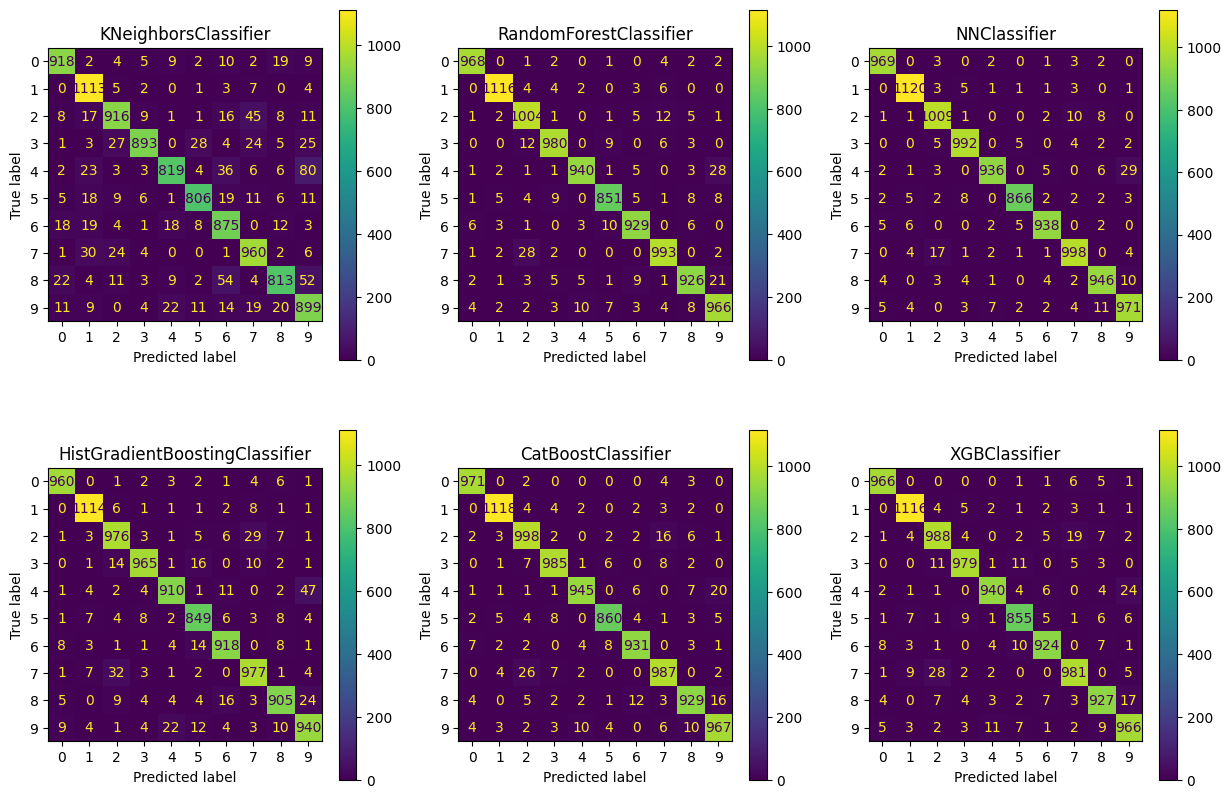

In [11]:
import cvtda.classification

cvtda.classification.classify(train_features, train_labels, test_features, test_labels)

In [13]:
import cvtda.utils

duplicates_remover = cvtda.utils.DuplicateFeaturesRemover()
train_features = duplicates_remover.fit_transform(train_features)
test_features = duplicates_remover.transform(test_features)

train_features.shape, test_features.shape

100%|██████████| 9594/9594 [00:16<00:00, 575.99it/s, partition_by=0, num_features=1, duplicates=346] 


Found 346 duplicates


((50000, 9594), (10000, 9594))

Fitting KNeighborsClassifier(n_jobs=-1, n_neighbors=50)
{'classifier': 'KNeighborsClassifier', 'Accuracy': 0.3153, 'TOP-2 Accuracy': 0.4917, 'TOP-3 Accuracy': 0.6202, 'TOP-4 Accuracy': 0.7121, 'TOP-5 Accuracy': 0.7886, 'TOP-6 Accuracy': 0.8486, 'TOP-7 Accuracy': 0.9005, 'TOP-8 Accuracy': 0.9409, 'TOP-9 Accuracy': 0.9746, 'AUC-ROC': 0.7508879555555557, 'Precision': 0.31426226335151125, 'Recall': 0.3153, 'F1-score': 0.30836957733414694}
Fitting RandomForestClassifier(n_jobs=-1, random_state=42)
{'classifier': 'RandomForestClassifier', 'Accuracy': 0.4169, 'TOP-2 Accuracy': 0.6121, 'TOP-3 Accuracy': 0.7175, 'TOP-4 Accuracy': 0.7934, 'TOP-5 Accuracy': 0.8545, 'TOP-6 Accuracy': 0.8992, 'TOP-7 Accuracy': 0.9335, 'TOP-8 Accuracy': 0.9611, 'TOP-9 Accuracy': 0.9836, 'AUC-ROC': 0.8216789555555557, 'Precision': 0.4112031672216946, 'Recall': 0.41690000000000005, 'F1-score': 0.4113902903963881}
Fitting <cvtda.classification.nn_classifier.NNClassifier object at 0x0000019FDC74DBD0>
Input to LazyLinear

100%|██████████| 25/25 [03:00<00:00,  7.23s/it, loss=9.75e+4, val_acc=0.516]


{'classifier': 'NNClassifier', 'Accuracy': 0.5156, 'TOP-2 Accuracy': 0.6993, 'TOP-3 Accuracy': 0.796, 'TOP-4 Accuracy': 0.8599, 'TOP-5 Accuracy': 0.9063, 'TOP-6 Accuracy': 0.938, 'TOP-7 Accuracy': 0.9597, 'TOP-8 Accuracy': 0.9779, 'TOP-9 Accuracy': 0.9908, 'AUC-ROC': 0.86019105, 'Precision': 0.5033113826164554, 'Recall': 0.5156, 'F1-score': 0.502148632147505}
Fitting HistGradientBoostingClassifier(max_depth=4, max_features=0.1, max_iter=20,
                               random_state=42)
{'classifier': 'HistGradientBoostingClassifier', 'Accuracy': 0.4319, 'TOP-2 Accuracy': 0.6335, 'TOP-3 Accuracy': 0.7469, 'TOP-4 Accuracy': 0.8231, 'TOP-5 Accuracy': 0.8786, 'TOP-6 Accuracy': 0.9195, 'TOP-7 Accuracy': 0.9523, 'TOP-8 Accuracy': 0.9745, 'TOP-9 Accuracy': 0.9895, 'AUC-ROC': 0.8393774666666667, 'Precision': 0.42474039918943396, 'Recall': 0.4319, 'F1-score': 0.42462004294616096}
Fitting <catboost.core.CatBoostClassifier object at 0x0000019FDC74D630>
Learning rate set to 0.309284
0:	learn: 2.

,classifier,Accuracy,TOP-2 Accuracy,TOP-3 Accuracy,TOP-4 Accuracy,TOP-5 Accuracy,TOP-6 Accuracy,TOP-7 Accuracy,TOP-8 Accuracy,TOP-9 Accuracy,AUC-ROC,Precision,Recall,F1-score
0,KNeighborsClassifier,0.3153,0.4917,0.6202,0.7121,0.7886,0.8486,0.9005,0.9409,0.9746,0.750888,0.314262,0.3153,0.308370
1,RandomForestClassifier,0.4169,0.6121,0.7175,0.7934,0.8545,0.8992,0.9335,0.9611,0.9836,0.821679,0.411203,0.4169,0.411390
2,NNClassifier,0.5156,0.6993,0.7960,0.8599,0.9063,0.9380,0.9597,0.9779,0.9908,0.860191,0.503311,0.5156,0.502149
3,HistGradientBoostingClassifier,0.4319,0.6335,0.7469,0.8231,0.8786,0.9195,0.9523,0.9745,0.9895,0.839377,0.424740,0.4319,0.424620
4,CatBoostClassifier,0.5214,0.7204,0.8209,0.8837,0.9252,0.9531,0.9733,0.9866,0.9949,0.890542,0.515480,0.5214,0.517358
5,XGBClassifier,0.4709,0.6673,0.7711,0.8463,0.9009,0.9386,0.9636,0.9803,0.9933,0.860390,0.464397,0.4709,0.465439


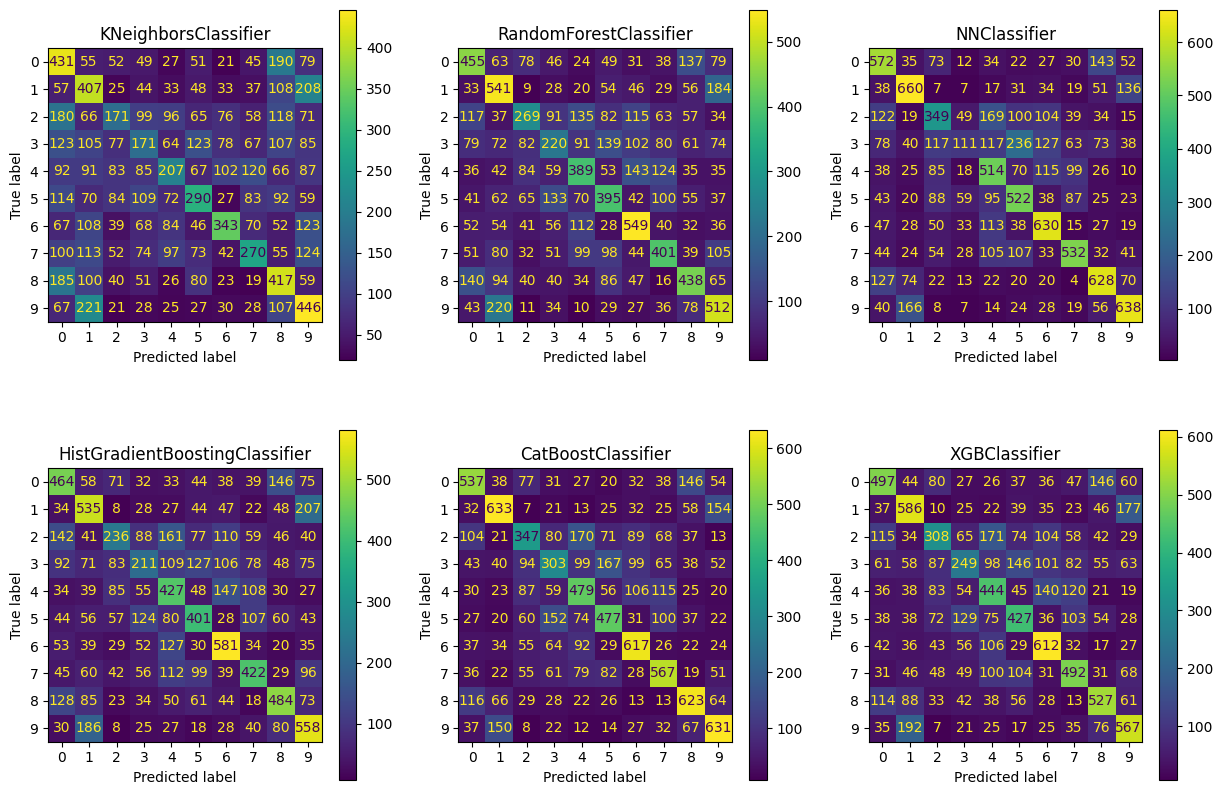

In [14]:
cvtda.classification.classify(train_features, train_labels, test_features, test_labels)

Fitting the information value feature selector


information values: 100%|██████████| 9594/9594 [01:33<00:00, 102.19it/s]

Fitting complete


<Axes: >

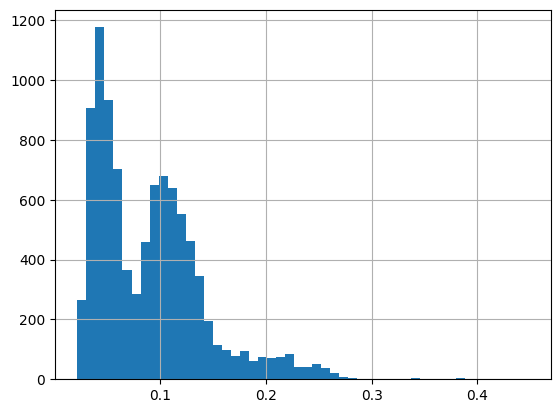

In [15]:
import cvtda.classification

feature_selector = cvtda.classification.InformationValueFeatureSelector(threshold = 0.05, bins = 50)
feature_selector.fit(train_features, train_labels)
feature_selector.hist()

In [16]:
train_features = feature_selector.transform(train_features)
test_features = feature_selector.transform(test_features)

train_features.shape, test_features.shape

((50000, 6893), (10000, 6893))

In [ ]:
cvtda.classification.classify(train_features, train_labels, test_features, test_labels)

Fitting KNeighborsClassifier(n_jobs=-1, n_neighbors=50)


Fitting the correlations feature selector
Fitting complete


((50000, 10872), (10000, 10872))

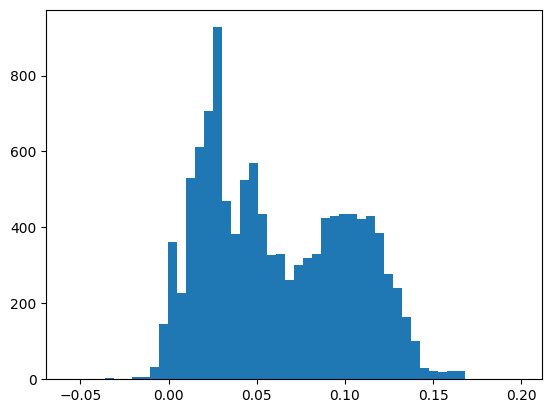

In [17]:
correlation_selector = cvtda.classification.CorrelationSelector(threshold = 0.01)

train_features = correlation_selector.fit_transform(train_features, train_labels)
test_features = correlation_selector.transform(test_features)

correlation_selector.hist()

train_features.shape, test_features.shape

Fitting KNeighborsClassifier(n_jobs=-1, n_neighbors=50)
{'classifier': 'KNeighborsClassifier', 'Accuracy': 0.346, 'TOP-2 Accuracy': 0.5321, 'TOP-3 Accuracy': 0.6459, 'TOP-4 Accuracy': 0.7363, 'TOP-5 Accuracy': 0.8063, 'TOP-6 Accuracy': 0.8678, 'TOP-7 Accuracy': 0.9139, 'TOP-8 Accuracy': 0.9486, 'TOP-9 Accuracy': 0.9793, 'AUC-ROC': 0.7737887888888887, 'Precision': 0.34444240512058755, 'Recall': 0.34600000000000003, 'F1-score': 0.3388181444958317}
Fitting RandomForestClassifier(n_jobs=-1, random_state=42)
{'classifier': 'RandomForestClassifier', 'Accuracy': 0.4283, 'TOP-2 Accuracy': 0.6168, 'TOP-3 Accuracy': 0.7247, 'TOP-4 Accuracy': 0.7992, 'TOP-5 Accuracy': 0.8551, 'TOP-6 Accuracy': 0.9005, 'TOP-7 Accuracy': 0.9361, 'TOP-8 Accuracy': 0.963, 'TOP-9 Accuracy': 0.9838, 'AUC-ROC': 0.8269249500000001, 'Precision': 0.42218733653867985, 'Recall': 0.42829999999999996, 'F1-score': 0.42220548856924334}
Fitting <cvtda.classification.nn_classifier.NNClassifier object at 0x0000019BA7263820>
Input t

100%|██████████| 25/25 [03:26<00:00,  8.28s/it, loss=9.65e+4, val_acc=0.527]


{'classifier': 'NNClassifier', 'Accuracy': 0.5267, 'TOP-2 Accuracy': 0.7183, 'TOP-3 Accuracy': 0.8113, 'TOP-4 Accuracy': 0.8698, 'TOP-5 Accuracy': 0.9139, 'TOP-6 Accuracy': 0.942, 'TOP-7 Accuracy': 0.9655, 'TOP-8 Accuracy': 0.9807, 'TOP-9 Accuracy': 0.992, 'AUC-ROC': 0.8703356777777779, 'Precision': 0.5148428661077391, 'Recall': 0.5267000000000001, 'F1-score': 0.515815500957445}
Fitting HistGradientBoostingClassifier(max_depth=4, max_features=0.1, max_iter=20,
                               random_state=42)
{'classifier': 'HistGradientBoostingClassifier', 'Accuracy': 0.4466, 'TOP-2 Accuracy': 0.6423, 'TOP-3 Accuracy': 0.7498, 'TOP-4 Accuracy': 0.8266, 'TOP-5 Accuracy': 0.8829, 'TOP-6 Accuracy': 0.9228, 'TOP-7 Accuracy': 0.9544, 'TOP-8 Accuracy': 0.9759, 'TOP-9 Accuracy': 0.9908, 'AUC-ROC': 0.8448263999999998, 'Precision': 0.4395652219798623, 'Recall': 0.44659999999999994, 'F1-score': 0.4386960339354705}
Fitting <catboost.core.CatBoostClassifier object at 0x0000019BA7261BD0>
Learning ra

,classifier,Accuracy,TOP-2 Accuracy,TOP-3 Accuracy,TOP-4 Accuracy,TOP-5 Accuracy,TOP-6 Accuracy,TOP-7 Accuracy,TOP-8 Accuracy,TOP-9 Accuracy,AUC-ROC,Precision,Recall,F1-score
0,KNeighborsClassifier,0.3460,0.5321,0.6459,0.7363,0.8063,0.8678,0.9139,0.9486,0.9793,0.773789,0.344442,0.3460,0.338818
1,RandomForestClassifier,0.4283,0.6168,0.7247,0.7992,0.8551,0.9005,0.9361,0.9630,0.9838,0.826925,0.422187,0.4283,0.422205
2,NNClassifier,0.5267,0.7183,0.8113,0.8698,0.9139,0.9420,0.9655,0.9807,0.9920,0.870336,0.514843,0.5267,0.515816
3,HistGradientBoostingClassifier,0.4466,0.6423,0.7498,0.8266,0.8829,0.9228,0.9544,0.9759,0.9908,0.844826,0.439565,0.4466,0.438696
4,CatBoostClassifier,0.5286,0.7235,0.8244,0.8854,0.9251,0.9529,0.9739,0.9874,0.9948,0.892642,0.523290,0.5286,0.524935
5,XGBClassifier,0.4829,0.6760,0.7814,0.8545,0.9041,0.9396,0.9629,0.9798,0.9939,0.865072,0.477046,0.4829,0.477770


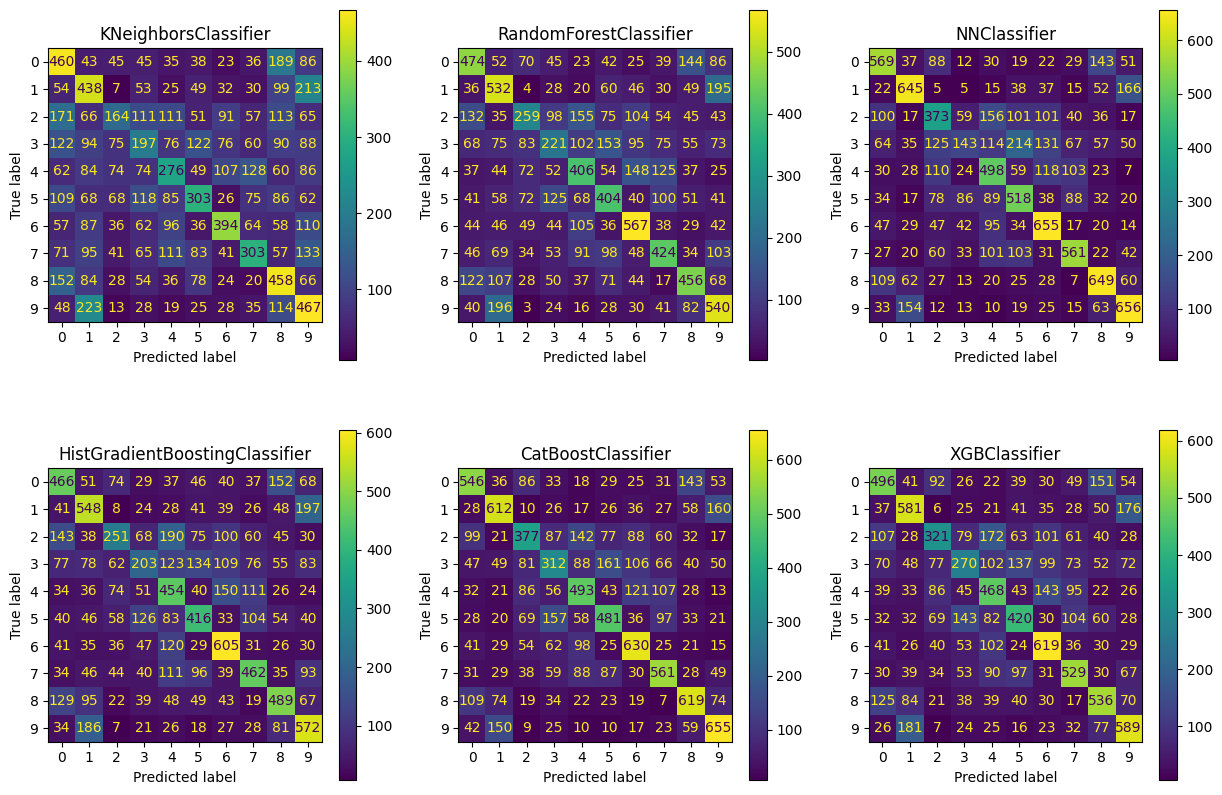

In [18]:
cvtda.classification.classify(train_features, train_labels, test_features, test_labels)